<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter2_사이킷런으로 시작하는 머신러닝


## 1. 사이킷런 소개와 특징

사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리임.

<사이킷런 특징>

- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API 제공함
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공함
- 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리임


In [2]:
pip install -U scikit-learn

In [3]:
import sklearn

print(sklearn.__version__)

1.6.1


## 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

- 붓꽃 데이터 세트: 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처 기반으로 꽃의 품종 예측
- 분류(classification): 대표적인 지도학습 방법
- 지도학습: 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 모듈명은 sklearn으로 시작하는 명명규칙이 있음

1. sklearn.datasets: 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
2. sklearn.tree: 트리 기반 ML알고리즘을 구현한 클래스의 모임
3. sklearn.model_selection: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모
- DecisionTreeClassifier 적용
- train_test_split()함수 사용

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(Feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처에는 sepal length, sepal width, petal length, petal width가 있음. 레이블은 0, 1, 2 세 가지 값으로 돼 있으며 0이 Setosa, 1이 versicolor, 2가 virginica임

- 학습용 데이터와 테스트용 데이터 분리
- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요함
- **test_size**: 입력값의 비율로 학습 데이터와 테스트 데이터를 분할

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- 첫 번째 파라미터: iris_data(피처 데이터 세트)
- 두 번째 파라미터: iris_label(레이블 데이터 세트)
- random_state: 호출할 때마다 같은 학습/테스트 용 데이터 세트 생성하기 위해 주어지는 난수 발생 값

학습 데이터를 확보했으니 이 데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측 수행.

In [7]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

의사 결정 트리 기반의 DecisionTreeClassifier객체는 학습 데이터 기반으로 학습이 완료됨. 이 객체를 이용해 예측 수행. 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 테스트 데이터 세트를 이용

In [8]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

예측 결과를 기반으로 DecisionTreeClassifier의 예측 성능 평가.
- 정확도: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표임
- accuracy_score()는 정확도 측정하는 함수

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


학습 결과 의사 결정 트리의 알고리즘 예측 정확도가 약 0.9333으로 측정됨.

<예측 프로세스>
1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터 기반으로 ML 알고리즘 적용해 모델 학습시킴
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가

## 3. 사이킷런의 기반 프레임워크 익히기



### Estimator 이해 및 fit(), predict() 메서드

모델 학습을 위해서 fit(), 학습된 모델의 예측을 위해 predict()메서드를 제공함. 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭함. 이들 Classifier와 Regressor를 합쳐 Estimator클래스라고 부름. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름. 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현함.

비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용함. 비지도학습과 피처 추출에서 fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업임. 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 실제 작업은 transform()으로 수행함.

- fit() + transform() = fit_transform()

### 사이킷런의 주요 모듈

<예제 데이터>
- **sklearn.datasets**: 사이킷런에 내장되어 예제로 제공하는 데이터 세트

<피처 처리>
- **sklearn.preprocessing**: 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링)
- **sklearn.feature_selection**: 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
- **sklearn.feature_extraction**: 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨

<피처 처리 & 차원 축소>
- **sklearn.decomposition**: 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소

<데이터 분리, 검증 & 파라미터 튜닝>
- **sklearn.model_selection**: 교차 검증을 위한 학습용/테스트용 분리

<평가>
- sklearn.metrics: 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공

<ML 알고리즘>
- **sklearn.ensemble**: 앙상블 알고리즘 제공, 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등 제공
- **sklearn.linear_model**: 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 관련 알고리즘 지원, SGD관련 알고리즘도 제공
- **sklearn.naive_bayes**: 나이브 베이즈 알고리즘 제공
- **sklearn.neighbors**: 최근접 이웃 알고리즘 제공, K-NN
- **sklearn.svm**: 서포트 벡터 머신 알고리즘 제공
- **sklearn.tree**: 의사 결정 트리 알고리즘 제공
- **sklearn.cluster**: 비지도 클러스터링 알고리즘 제공(K-평균, 계층형, DBSCAN)

<유틸리티>
- **sklearn.pipeline**: 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어 실행할 수 있는 유틸리티 제공

### 내장된 예제 데이터 세트

사이킷런에 내장되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제 용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나눠짐

- datasets.load_boston(): 회귀 용도, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
- datasets.load_breast_cancer(): 분류 용도, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
- datasets.load_diabetes(): 회귀 용도, 당뇨 데이터셋
- datasets.load_digits(): 분류 용도, 0에서 9까지 숫자의 이미지 픽셀 데이터 셋
- datasets.load_iris(): 분류 용도, 붓꽃에 대한 피처를 가진 데이터 셋


<fetch 계열의 명령>
- fetch_covtype(): 회귀분석용 토지 조사 자료
- fetch_20newsgroups(): 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces(): 얼굴 이미지 자료
- fetch_lfw_people(): 얼굴 이미지 자료
- fetch_lfw_pairs(): 얼굴 이미지 자료
- fetch_rcv1(): 로이터 뉴스 말뭉치
- fetch_mldata(): ML 웹사이트에서 다운로드

< 분류와 클러스터링을 위한 표본 데이터 생성기 >
- datasets.make_classifications(): 분류를 위한 데이터 세트 만듦. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
- datasets.make_blobs(): 클러스터링을 위한 데이터 세트 무작위 생성. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 줌.


<키>
- data: 피처의 데이터 세트
- target: 분류 시 레이블 값, 회귀일 떄는 숫자 결괏값 데이터 세트
- target_names: 개별 레이블의 이름
- feature_names: 피처의 이름
- DESCR: 데이터 세트에 대한 설명과 각 피처의 설명


In [10]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


load_iris() API의 반환 결과는 **sklearn.utils.Bunch**클래스임. Bunch 클래스 파이썬 딕셔너리 자료형과 유사.

In [11]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
print('\n feature_names의 type: ', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type:  <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

## 4. Model Selection 모듈 소개

사이킷런 model_selection모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()


In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


- 첫 번째 파라미터: 피처 데이터 세트
- 두 번째 파라미터: 레이블 데이터 세트
- test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링. 디폴트는 0.25
- train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링. test_size를 더 많이 사용
- shuffle: 데이터 분리하기 전에 데이터를 미리 섞을지 결정. 디폴트는 True. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트 만드는 데 사용
- random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트 생성위해 주어지는 난수 값.
- train_test_split()의 반환값은 튜플 형태. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 세트 반환


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [15]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


### 교차 검증

고정된 학습 데이터와 테스트 데이터로 평가하면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김. 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어질 것.

교차 검증은 이러한 데이터 편증을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것. ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있음

### K 폴드 교차 검증

먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법임.

< 5폴드 교차 검증 >

5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가. 먼저 데이터 세트를 5등분 함. 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 5번째 등분 하나를 검증 데이터 세트로 설정하고 학습 수행과 평가를 수행함. 두 번째 반복에서 다시 비슷한 학습과 평가 작업 수행.

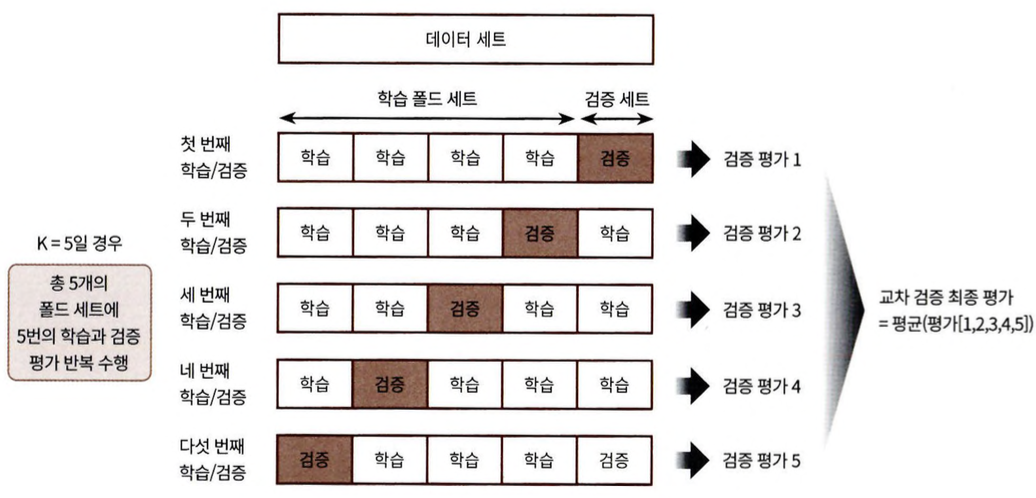

K 폴드 교차 검증 프로세스 구현
- KFold
- StratifiedKFold

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- split(): 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리
- 전체 붓꽃 데이터 = 150 -> 4/5인 120개는 학습용 데이터/1/5인 30개는 검증 데이터 세트


In [17]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환

for train_index, test_index in kfold.split(features):

  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기 :{2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  # 개별 iteration별 정확도를 합하여 평균 정확도 계산
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 :1.0, 학습 데이터 크기 :120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기 :120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 0.98335

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기 :120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9444666666666667

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기 :120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.941675

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기 :120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- 교차 검증 시마다 검증 세트의 인덱스가 달라짐

### Stratified K 폴드

- 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합 = 특정 레이블 값이 많거나 매우 적어 값의 분포가 한쪽으로 치우치는 것
- 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습, 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌

In [18]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


In [20]:
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index, in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차검증:{0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차검증:1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차검증:2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차검증:3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


첫 번째 교차 검증에서는 학습 레이블의 1,2 값이 각각 50개 추출되었고, 검증 레이블의 0값이 50개 추출됨. 이 경우 0의 경우는 전혀 학습 못함. 이런 문제를 StrarifiedKFold가 해결.

In [23]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [28]:
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):

  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#4 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#4 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#5 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#5 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#6 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#6 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


Stratified K Fold 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드로 교차 검증해야함.

### 교차 검증을 보다 간편하게 - cross_val_score()

< K-Fold로 데이터 학습 & 예측 >
1. 폴드 세트 설정
2. for 루프에ㅓㅅ 반복으로 학습, 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측 수행

-> cross_val_score()은 이런 일련의 과정 한꺼번에 수행

< cross_val_score() API 선언 형태 >

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

- 주요 파라미터: estimator, X, y, scoring, cv

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label= iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:' , np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- 하이퍼 파라미터: 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이 값을 조정해 알고리즘의 예측 성능 개선할 수 있음
- 사이킷런은 GridSearchCV API이용해 Classifier나 Regressor과 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공.


In [30]:
grid_parameter = {'max_depth': [1,2,3],
                  'min_samples_split': [2,3]}

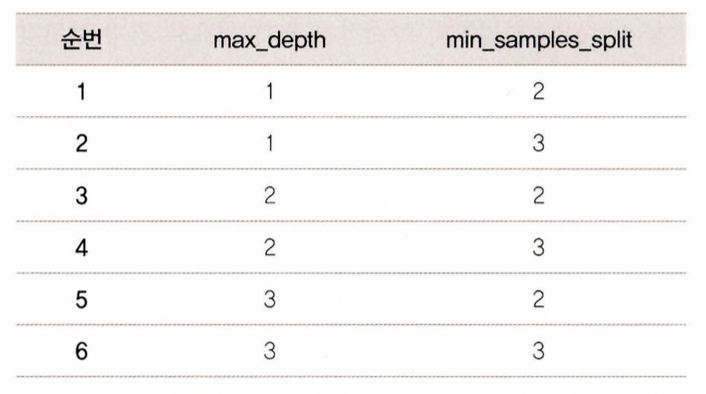

- GridSearchCV는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌.
- 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 순차적으로 테스트하므로 수행 시간이 상대적으로 오래걸림

< 주요 파라미터 >
- estimator: classifier, regressor, pipeline
- param_grid: key + 리스트 값을 가지는 딕셔너리가 주어짐
- scoring: 예측 성능을 측정할 평가 방법을 지정함
- cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
- refit: 디폴트가 True, True로 생성시 가장 최적의 하이퍼 파라미터 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [34]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit = True가 Default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [35]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [36]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
